# Setup

In [ ]:
import locale
locale.getpreferredencoding = lambda: 'UTF-8'
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 89.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.5 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=dcbdb4dd792d66da60bdc3d54ee9da492de401bc37f7c610a01996f0729249c3
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
import pickle
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer

# Deploy do modelo

In [ ]:
modeloTransformersImportado = ('/content/modelo_rede_neural_Transformers.pkl')

In [ ]:
with open(modeloTransformersImportado, 'rb') as f:
    modeloTransformers = pickle.load(f)

FileNotFoundError: ignored

In [ ]:
vetorizador = SentenceTransformer('distiluse-base-multilingual-cased')

# Teste do modelo importado

In [ ]:
dadosteste = {
    'frase': ["esse o pior banco que ja vi em toda minha vida","muito ruim", "muito bom", "adorei", "nao gostei muito nao", "."],
}
dfteste = pd.DataFrame(dadosteste)
dfteste

In [ ]:
def prever1(dados):
  dados = vetorizador.encode(dados.tolist())
  dados = pd.DataFrame(dados)
  previsoes = modeloTransformers.predict(dados)
  previsoes = np.argmax(previsoes, axis=1)
  return previsoes

In [ ]:
prever1(dfteste["frase"])

In [ ]:
dfteste['sentimento'] = pd.Series(prever1(dfteste["frase"]))

In [ ]:
dfteste

In [ ]:
# df_ = dfteste
# df_['sentimento'] = pd.Series(prever1(df_["frase"]))
# df_['sentimento'] = df_['sentimento'].replace({0: 'POSITIVE',1: 'NEUTRAL', 2: 'NEGATIVE'})
# df_['texto'] = df_['frase'] + ' [' + df_['sentimento'] + ']'


# quantidades = df_['sentimento'].value_counts()
# labels = quantidades.index
# fig, ax = plt.subplots()
# ax.pie(quantidades, labels=labels, autopct='%1.1f%%')
# ax.set_title('Sentimentos do corpus')

In [ ]:
# df_


In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [37]:
def label(file, nome_da_coluna_texto):
    df = pd.read_csv(file.name)

    df['sentimento'] = pd.Series(prever1(df[nome_da_coluna_texto]))
    df['sentimento'] = df['sentimento'].replace({0: 'POSITIVE',1: 'NEUTRAL', 2: 'NEGATIVE'})

    #lista dos textos
    df['Primeiras 5 frases'] = df[nome_da_coluna_texto] + '  -  [' + df['sentimento'] + ']'
    texto = pd.DataFrame(df['Primeiras 5 frases']).head()



    #criacao do grafico
    quantidades = df['sentimento'].value_counts()
    labels = quantidades.index
    fig, ax = plt.subplots()
    fig.patch.set_facecolor('#1F2937') #mudar a cor de fundo do grafico

    ax.pie(quantidades, labels=labels, autopct='%1.1f%%')
    ax.set_title('Sentimentos do corpus', color='white')

    x = str(quantidades)

    #tamanho do corpus do corpus
    num_tuplas = "Número de Tuplas: " + str(len(df))



    return [num_tuplas,x, fig, texto.to_html()]


iface = gr.Interface(fn=label,
                     inputs=["file", "text"],
                     outputs=["text", "text","plot", gr.outputs.HTML()],
                     title= "Analize de Sentimento")
iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://dafffb5a430e58bf75.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [74]:
dfData = pd.read_csv("/content/dfdata.csv")

In [75]:
dfData['dataPublicada'] = dfData['dataPublicada'].str.slice(1, 11)

In [76]:
dfData

,texto,targetSentimento,dataPublicada
0,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,2022-03-04
1,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,2022-03-04
2,Minuto touro de ouro,POSITIVE,2022-03-04
3,@ricktolledo Sim,NEUTRAL,2022-03-03
4,Queria saber se a Btg banking é a própria btg ...,POSITIVE,2022-03-03
...,...,...,...
9482,Atendam o telefone pelo amor de Deus,POSITIVE,2022-11-30
9483,Você sabe quais são os 10 maiores FIIs do merc...,POSITIVE,2022-11-30
9484,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,2022-11-30
9485,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,2022-11-30


In [77]:
dfData['dataPublicada'] = pd.to_datetime(dfData['dataPublicada'])

In [78]:
dfData.set_index('dataPublicada', inplace=True)

In [79]:
dfData

,texto,targetSentimento
dataPublicada,,
2022-03-04,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL
2022-03-04,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL
2022-03-04,Minuto touro de ouro,POSITIVE
2022-03-03,@ricktolledo Sim,NEUTRAL
2022-03-03,Queria saber se a Btg banking é a própria btg ...,POSITIVE
...,...,...
2022-11-30,Atendam o telefone pelo amor de Deus,POSITIVE
2022-11-30,Você sabe quais são os 10 maiores FIIs do merc...,POSITIVE
2022-11-30,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL


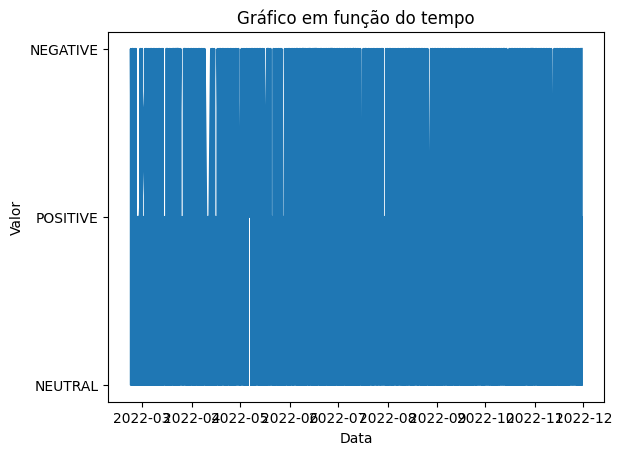

In [81]:
plt.plot(dfData.index, dfData['coluna_desejada'], marker='o', linestyle='-', label='Positivo')
plt.plot(dfData.index, dfData['outra_coluna'], marker='s', linestyle='--', label='Negativo')
plt.plot(dfData.index, dfData['mais_uma_coluna'], marker='^', linestyle='-.', label='Neutro')

plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Gráfico de Linhas em função do tempo')
plt.legend()  # Adiciona a legenda com os rótulos das linhas
plt.show()